In [57]:
#set up packages and read data
import pandas as pd
import numpy as np
import datetime as datetime
from dfply import *

#import msno package
import missingno as msno


## Read Data

In [83]:
#data from scrape
ds = pd.read_csv('ds_scrape.csv')
ps2 = pd.read_csv('ps2_scrape.csv')
ps3 = pd.read_csv('ps3_scrape.csv')
wii = pd.read_csv('wii_scrape.csv')
#sales data
sales = pd.read_csv('vgsales.csv')
#sales in dollar data
dollar = pd.read_csv('money_sale.csv')

#### concat the data from different consoles

In [84]:
console = pd.concat([ds, ps2,ps3,wii])

In [85]:
console.head()


,Pos,Game,Game.1,Console,Publisher,VGChartz Score,Critic Score,User Score,Total Shipped,Release Date,Last Update,random
0,1,NaN,New Super Mario Bros.,NaN,Nintendo,NaN,9.1,8.1,30.80m,15th May 06,NaN,NaN
1,2,NaN,Nintendogs,NaN,Nintendo,NaN,8.4,NaN,23.96m,23rd Aug 05,NaN,NaN
2,3,NaN,Mario Kart DS,NaN,Nintendo,NaN,9.1,9.4,23.60m,14th Nov 05,NaN,NaN
3,4,NaN,Brain Age: Train Your Brain in Minutes a Day,NaN,Nintendo,NaN,8.1,NaN,19.01m,17th Apr 06,NaN,NaN
4,5,NaN,Pokémon Diamond / Pearl Version,NaN,Nintendo,NaN,8.6,NaN,17.67m,28th Apr 07,NaN,NaN


In [86]:
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### Merge the three dataframs

In [87]:
# change the column name from "Game.1" to "Name" in console\
console = console.rename(columns={"Game.1": "Name"})
console.head()

,Pos,Game,Name,Console,Publisher,VGChartz Score,Critic Score,User Score,Total Shipped,Release Date,Last Update,random
0,1,NaN,New Super Mario Bros.,NaN,Nintendo,NaN,9.1,8.1,30.80m,15th May 06,NaN,NaN
1,2,NaN,Nintendogs,NaN,Nintendo,NaN,8.4,NaN,23.96m,23rd Aug 05,NaN,NaN
2,3,NaN,Mario Kart DS,NaN,Nintendo,NaN,9.1,9.4,23.60m,14th Nov 05,NaN,NaN
3,4,NaN,Brain Age: Train Your Brain in Minutes a Day,NaN,Nintendo,NaN,8.1,NaN,19.01m,17th Apr 06,NaN,NaN
4,5,NaN,Pokémon Diamond / Pearl Version,NaN,Nintendo,NaN,8.6,NaN,17.67m,28th Apr 07,NaN,NaN


In [88]:
df = sales.merge(console, on='Name', how='left', indicator=True)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher_x,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,Console,Publisher_y,VGChartz Score,Critic Score,User Score,Total Shipped,Release Date,Last Update,random,_merge
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,...,NaN,Nintendo,NaN,7.7,NaN,82.90m,19th Nov 06,NaN,NaN,both
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [89]:
dollar.head()

,Year,Rev
0,2018,108.9
1,2014,76
2,2013,63
3,2012,66.2
4,2011,65.9


In [90]:
df = df.merge(dollar, on='Year', how='left')

In [91]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher_x,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,Publisher_y,VGChartz Score,Critic Score,User Score,Total Shipped,Release Date,Last Update,random,_merge,Rev
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,...,Nintendo,NaN,7.7,NaN,82.90m,19th Nov 06,NaN,NaN,both,44.25
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,15.07
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,67.92
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,72.22
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,44.17


## Clean Data

In [92]:
#firstly, only remain the columns needed
game = df.drop(columns = ['Rank','Pos', 'Game',
       'Console', 'Publisher_y', 'Total Shipped', 'Release Date', 'Last Update', 'random','VGChartz Score','User Score'
       ,'_merge','Name'])


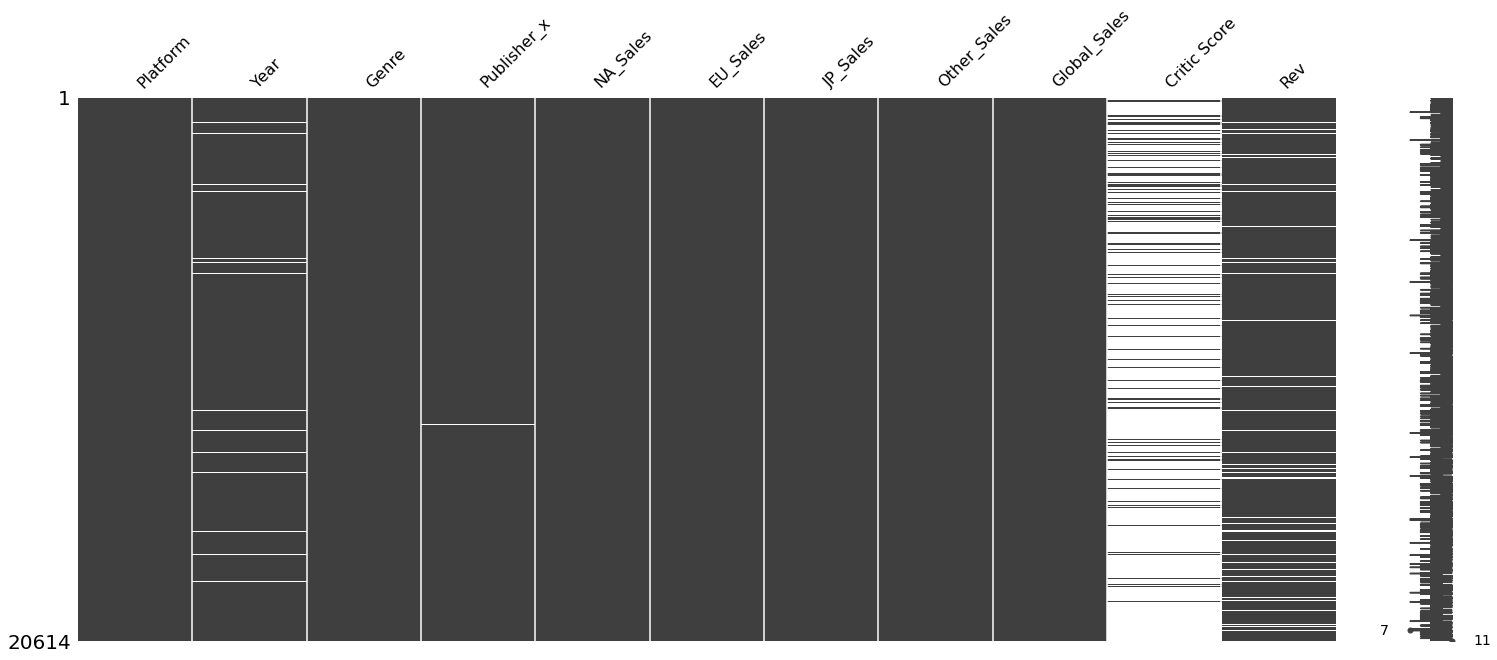

In [93]:
#visually assess missing values
msno.matrix(game)


In [94]:
#for the precision of our model, we would remove the observations with missing values
game = game.dropna()
game.head()

,Platform,Year,Genre,Publisher_x,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic Score,Rev
0,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,7.7,44.25
6,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,9.1,44.25
10,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76,8.4,54.55
11,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42,9.1,54.55
14,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00,8.0,72.22


In [105]:
game.to_csv('video_game.csv', index=False)

## Data Overview

In [98]:
# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt


In [103]:
game["Rev"] = game["Rev"].astype(float)

/Users/ruyiyang/opt/anaconda3/lib/python3.8/site-packages/plotnine/facets/facet.py:555: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


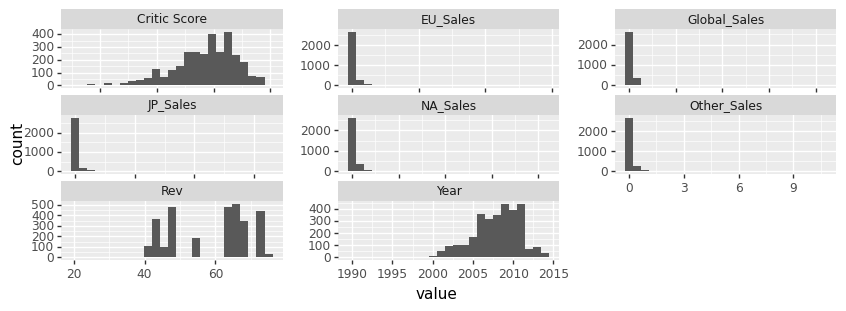

<ggplot: (319246346)>

In [104]:
# Plot the continuous Variables 
d = game.select_dtypes(include="float64").melt()
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

In [100]:
#Change categorical value to numerical
for col in ['Publisher_x','Genre','Platform']:
    game[col] = game[col].astype('category')

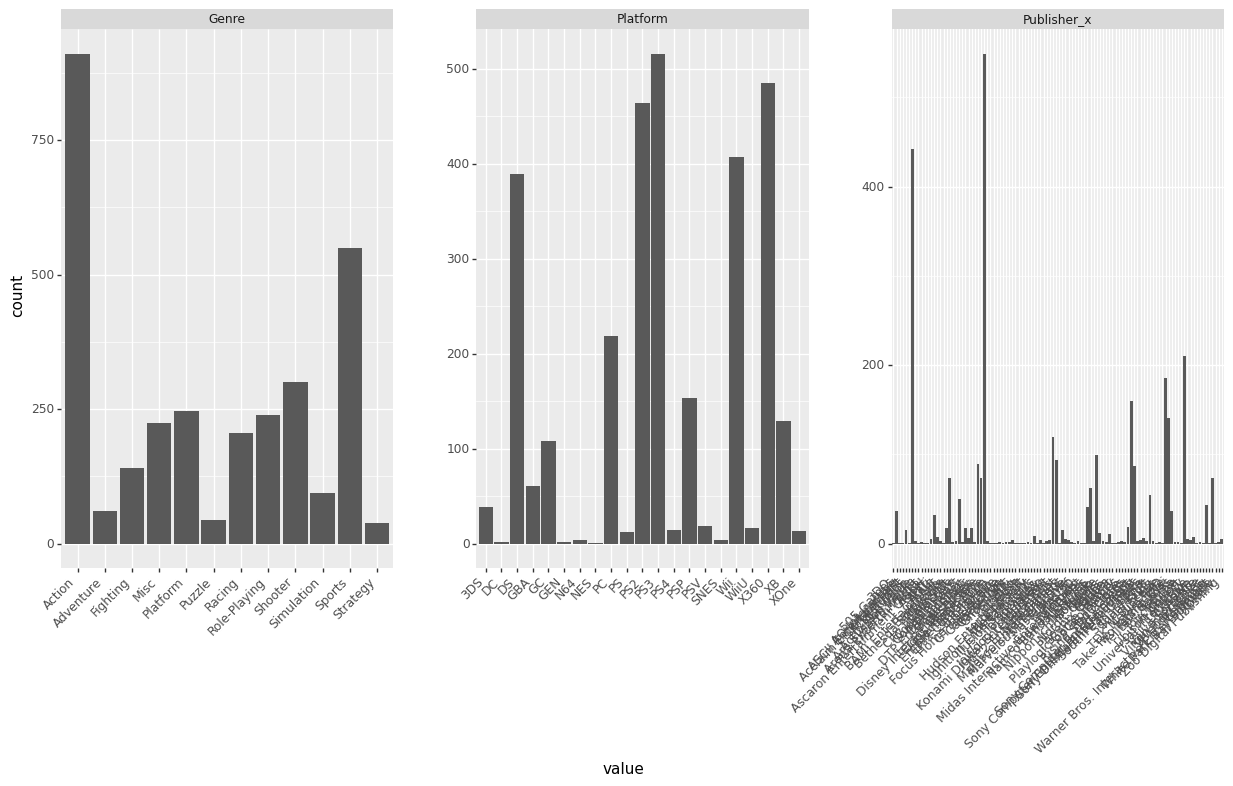

<ggplot: (319223287)>

In [101]:
d = game.select_dtypes(include="category").melt()
(
    ggplot(d,aes(x="value")) +
    geom_bar() +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(15,7),
          subplots_adjust={'wspace':0.25,
                           'hspace':0.75},
         axis_text_x=element_text(rotation=45, hjust=1))
)

## Pre-proocess Data

In [153]:

#From the previous data analysis, we need to 
# log transform assets, debt, income, Seniority and expenses.
final['Global_Sales'] = np.log(final['Global_Sales'] + 1)
final['JP_Sales'] = np.log(final['JP_Sales'] + 1)
final['NA_Sales'] = np.log(final['NA_Sales'] + 1)
final['EU_Sales'] = np.log(final['EU_Sales'] + 1)
final['Other_Sales'] = np.log(final['Other_Sales'] + 1)

In [154]:
#for the convenience of calculation, only consider the top 10 Publisher and group other publisher as "Others"
publish = (final.groupby(by=["Publisher"]).count()).sort_values(by=['Name'],ascending= False)[1:11]
Pub_list = publish.index.tolist()
#Pub_list
## Publisher
#(final.groupby(by=["Publisher"]).count()).sort_values(by=['Name'],ascending= False)[1:11]
final['Namco'] = 1*(final['Publisher'] == "Namco Bandai Games")
final['Ubisoft'] = 1*(final['Publisher'] == "Ubisoft")
final['Activision'] = 1*(final['Publisher'] == "Activision")
final['Sony'] = 1*(final['Publisher'] == "Sony Computer Entertainment")
final['EA'] = 1*(final['Publisher'] == "EA Sports")
final['Square_Enix'] = 1*(final['Publisher'] == "Square Enix")
final['Electronic_Arts'] = 1*(final['Publisher'] == "Electronic Arts")
final['Capcom'] = 1*(final['Publisher'] == "Capcom")
final['Tecmo_Koei'] = 1*(final['Publisher'] == "Tecmo Koei")
final['Warner_Bros'] = 1*(final['Publisher'] == "Warner Bros. Interactive Entertainment")

##Puzzle
final['Action'] = 1*(final['Genre'] == "Action")
final['Shooter'] = 1*(final['Genre'] == "Shooter")
final['Sports'] = 1*(final['Genre'] == "'Sports")
final['Role-Playing'] = 1*(final['Genre'] == "Role-Playing")
final['Adventure'] = 1*(final['Genre'] == "Adventure")
final['Misc'] = 1*(final['Genre'] == "Misc")
final['Platform'] = 1*(final['Genre'] == "Platform")
final['Strategy'] = 1*(final['Genre'] == "Strategy")
final['Simulation'] = 1*(final['Genre'] == "Simulation")
final['Racing'] = 1*(final['Genre'] == "Racing")
final['Puzzle'] = 1*(final['Genre'] == "Puzzle")
final['Fighting'] = 1*(final['Genre'] == "Fighting")

In [155]:
final.head()

,Name,Publisher,VGChartz Score,Critic Score,User Score,Total Shipped,Day_Since_Released,Rank,Platform,Year,...,Shooter,Sports,Role-Playing,Adventure,Misc,Strategy,Simulation,Racing,Puzzle,Fighting
1,Grand Theft Auto V,Rockstar Games,NaN,9.700000,NaN,NaN,2205.0,45.0,0,2014.0,...,0,0,0,0,0,0,0,0,0,0
2,Uncharted 4: A Thief's End,Sony Interactive Entertainment,NaN,9.200000,NaN,16.25m,1666.0,272.0,0,2016.0,...,1,0,0,0,0,0,0,0,0,0
3,Call of Duty: Black Ops 3,Activision,NaN,8.080556,NaN,NaN,1852.0,34.0,0,2015.0,...,1,0,0,0,0,0,0,0,0,0
9,FIFA 17,Electronic Arts,NaN,8.900000,NaN,NaN,1526.0,222.0,0,2016.0,...,0,0,0,0,0,0,0,0,0,0
10,The Witcher 3: Wild Hunt,Warner Bros. Interactive Entertainment,NaN,8.080556,NaN,10.80m,2023.0,332.0,0,2015.0,...,0,0,1,0,0,0,0,0,0,0


In [156]:
final.to_csv("final_table.csv", index=False)